**Alzheimer Disease Classification**


*   Machine Learning Project

**By Mehul Chaudhary**




In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
uraninjo_augmented_alzheimer_mri_dataset_path = kagglehub.dataset_download('uraninjo/augmented-alzheimer-mri-dataset')

print('Data source import complete.')


Using Colab cache for faster access to the 'augmented-alzheimer-mri-dataset' dataset.
Data source import complete.


In [2]:
import numpy as np
import pandas as pd
import os

In [3]:
base_path = "/kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/"
categories = ["MildDemented","ModerateDemented", "NonDemented", "VeryMildDemented"]

In [4]:
image_paths = []
labels = []

for category in categories:
    category_path = os.path.join(base_path, category)
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        image_paths.append(image_path)
        labels.append(category)

df = pd.DataFrame({
    "image_path": image_paths,
    "label": labels
})

In [5]:
df.head()

,image_path,label
0,/kaggle/input/augmented-alzheimer-mri-dataset/...,MildDemented
1,/kaggle/input/augmented-alzheimer-mri-dataset/...,MildDemented
2,/kaggle/input/augmented-alzheimer-mri-dataset/...,MildDemented
3,/kaggle/input/augmented-alzheimer-mri-dataset/...,MildDemented
4,/kaggle/input/augmented-alzheimer-mri-dataset/...,MildDemented


In [6]:
df.tail()

,image_path,label
33979,/kaggle/input/augmented-alzheimer-mri-dataset/...,VeryMildDemented
33980,/kaggle/input/augmented-alzheimer-mri-dataset/...,VeryMildDemented
33981,/kaggle/input/augmented-alzheimer-mri-dataset/...,VeryMildDemented
33982,/kaggle/input/augmented-alzheimer-mri-dataset/...,VeryMildDemented
33983,/kaggle/input/augmented-alzheimer-mri-dataset/...,VeryMildDemented


In [7]:
df.shape

(33984, 2)

In [8]:
df.columns

Index(['image_path', 'label'], dtype='object')

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.isnull().sum()

,0
image_path,0
label,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33984 entries, 0 to 33983
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  33984 non-null  object
 1   label       33984 non-null  object
dtypes: object(2)
memory usage: 531.1+ KB


In [12]:
df['label'].unique()

array(['MildDemented', 'ModerateDemented', 'NonDemented',
       'VeryMildDemented'], dtype=object)

In [13]:
df['label'].value_counts()

,count
label,
NonDemented,9600
MildDemented,8960
VeryMildDemented,8960
ModerateDemented,6464


In [14]:
import warnings
warnings.filterwarnings('ignore')

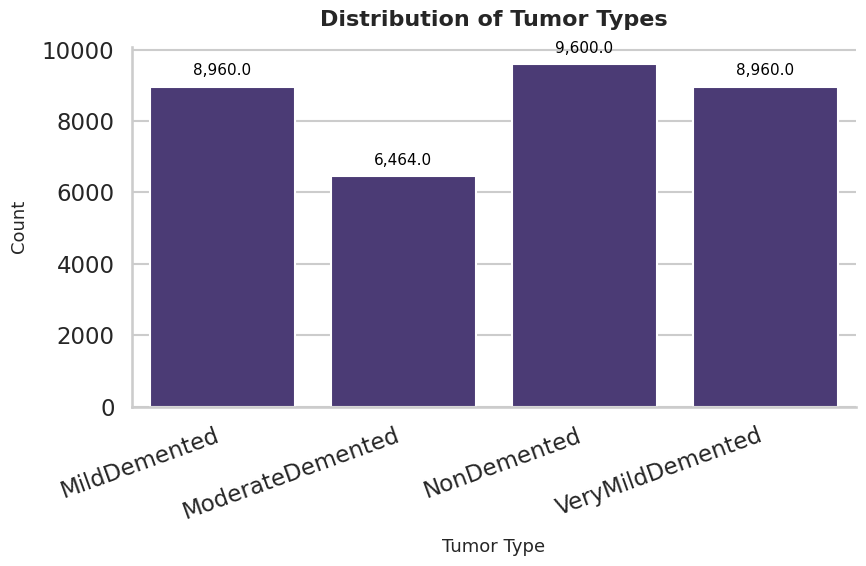

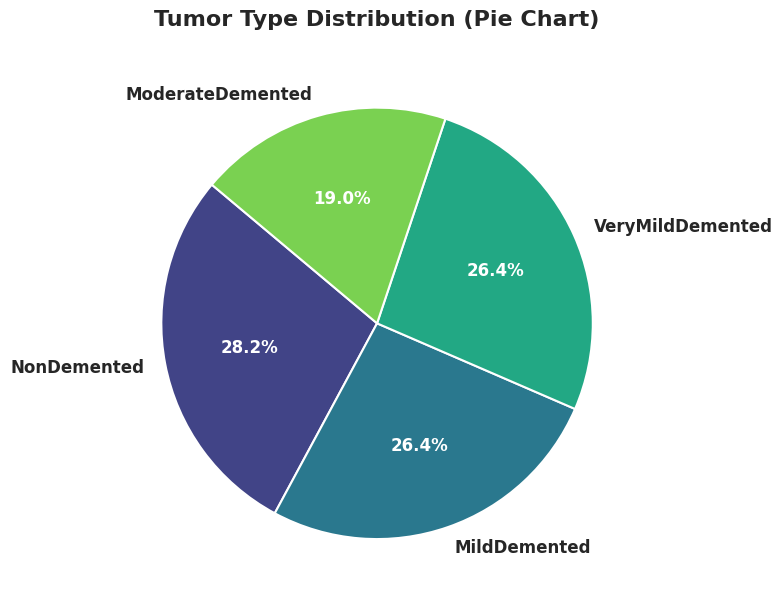

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", context="talk", palette="viridis")

fig, ax = plt.subplots(figsize=(9, 6))
sns.countplot(data=df, x="label", ax=ax)

ax.set_title("Distribution of Tumor Types", fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel("Tumor Type", fontsize=13, labelpad=10)
ax.set_ylabel("Count", fontsize=13, labelpad=10)

ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha='right')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=11, color='black', xytext=(0, 6),
                textcoords='offset points')

sns.despine()
plt.tight_layout()
plt.show()

label_counts = df["label"].value_counts()
colors = sns.color_palette("viridis", len(label_counts))

fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    label_counts,
    labels=label_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 12, 'weight': 'bold'},
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5}
)

for autotext in autotexts:
    autotext.set_color('white')

ax.set_title("Tumor Type Distribution (Pie Chart)", fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


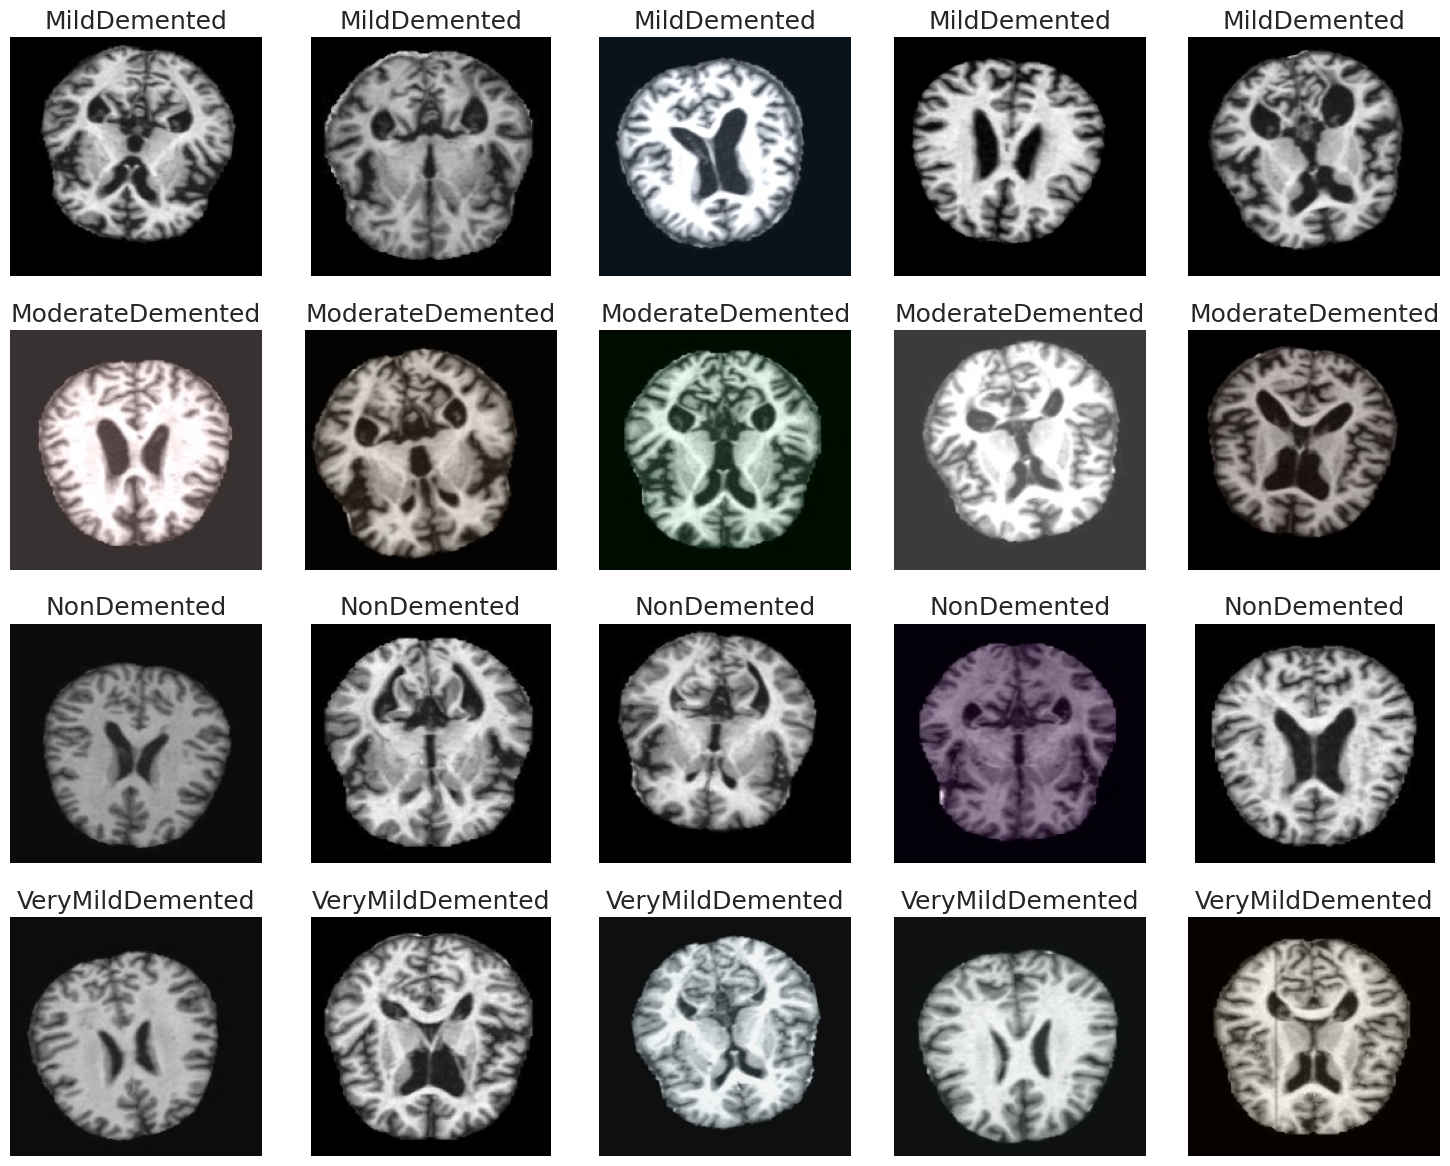

In [16]:
import cv2

num_images = 5

plt.figure(figsize=(15, 12))

for i, category in enumerate(categories):
    category_images = df[df['label'] == category]['image_path'].iloc[:num_images]

    for j, img_path in enumerate(category_images):

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(len(categories), num_images, i * num_images + j + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(category)

plt.tight_layout()
plt.show()

In [17]:
max_samples = df['label'].value_counts().max()

balanced_df = df.groupby('label', group_keys=False).apply(
    lambda x: x.sample(n=max_samples, replace=True, random_state=42)
).reset_index(drop=True)

balanced_df = balanced_df[['image_path', 'label']]

In [18]:
df = balanced_df

In [19]:
df

,image_path,label
0,/kaggle/input/augmented-alzheimer-mri-dataset/...,MildDemented
1,/kaggle/input/augmented-alzheimer-mri-dataset/...,MildDemented
2,/kaggle/input/augmented-alzheimer-mri-dataset/...,MildDemented
3,/kaggle/input/augmented-alzheimer-mri-dataset/...,MildDemented
4,/kaggle/input/augmented-alzheimer-mri-dataset/...,MildDemented
...,...,...
38395,/kaggle/input/augmented-alzheimer-mri-dataset/...,VeryMildDemented
38396,/kaggle/input/augmented-alzheimer-mri-dataset/...,VeryMildDemented
38397,/kaggle/input/augmented-alzheimer-mri-dataset/...,VeryMildDemented
38398,/kaggle/input/augmented-alzheimer-mri-dataset/...,VeryMildDemented


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

le = LabelEncoder()
df["label_encoded"] = le.fit_transform(df["label"])
num_classes = df["label_encoded"].nunique()

train_df, test_df = train_test_split(
    df, test_size=0.2, stratify=df["label_encoded"], random_state=42
)

class MRIDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_path = self.df.iloc[idx].image_path
        label = self.df.iloc[idx].label_encoded

        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label)

train_tf = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
])

test_tf = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
])

train_ds = MRIDataset(train_df, train_tf)
test_ds  = MRIDataset(test_df,  test_tf)

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
test_loader  = DataLoader(test_ds, batch_size=32, shuffle=False)

class HybridModel(nn.Module):
    def __init__(self, num_classes):
        super().__init__()

        self.cnn = models.mobilenet_v2(weights="IMAGENET1K_V1").features

        encoder_layer = nn.TransformerEncoderLayer(
            d_model=1280, nhead=8, dim_feedforward=2048, dropout=0.1
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=2)

        self.fc = nn.Linear(1280, num_classes)

    def forward(self, x):
        x = self.cnn(x)
        x = x.mean([-1,-2])
        x = x.unsqueeze(1)
        x = self.transformer(x)
        x = x.squeeze(1)
        return self.fc(x)

device = "cuda" if torch.cuda.is_available() else "cpu"
model = HybridModel(num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

train_losses, test_losses = [], []
train_acc_list, test_acc_list = [], []

epochs = 5

for epoch in range(epochs):
    model.train()
    total, correct, running_loss = 0, 0, 0

    for imgs, labels in train_loader:
        imgs, labels = imgs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (preds == labels).sum().item()

    train_losses.append(running_loss / len(train_loader))
    train_acc_list.append(correct / total)

    model.eval()
    t_loss, t_total, t_correct = 0, 0, 0
    with torch.no_grad():
        for imgs, labels in test_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            loss = criterion(outputs, labels)

            t_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            t_total += labels.size(0)
            t_correct += (preds == labels).sum().item()

    test_losses.append(t_loss / len(test_loader))
    test_acc_list.append(t_correct / t_total)

    print(f"Epoch {epoch+1}/{epochs} | Train Acc={train_acc_list[-1]:.4f} | Test Acc={test_acc_list[-1]:.4f}")

plt.figure(figsize=(8,5))
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(train_acc_list, label="Train Accuracy")
plt.plot(test_acc_list, label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend()
plt.show()

all_preds, all_labels = [], []

model.eval()
with torch.no_grad():
    for imgs, labels in test_loader:
        imgs = imgs.to(device)
        outputs = model(imgs)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.numpy())

cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=le.classes_,
            yticklabels=le.classes_,
            cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

print("\n=== Classification Report ===\n")
print(classification_report(all_labels, all_preds, target_names=le.classes_))


Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


100%|██████████| 13.6M/13.6M [00:00<00:00, 115MB/s]
